# Project Milestone 4 : Connecting to an API/Pulling in the Data and Cleaning/Formatting
## DSC540
### Astrid Fuentes


Perform at least 5 data transformation and/or cleansing steps to your API data. For example:

- Replace Headers
- Format data into a more readable format
- Identify outliers and bad data
- Find duplicates
- Fix casing or inconsistent values
- Conduct Fuzzy Matching


You can submit a Jupyter Notebook or a PDF of your code. If you submit a .py file you need to also include a PDF or attachment of your results.

My API is from https://covidtracking.com/data/api

In [41]:
# Define the libraries
import pandas as pd
import os
import urllib.request, urllib.parse, urllib.error
import json
import matplotlib.pyplot as plt

%matplotlib inline

In [25]:
path="/Users/astrid/Documents/GitHub/Data-Wrangling-with-Python/DS540/Project"
os.chdir(path)

In [26]:
os.getcwd()

'/Users/astrid/Documents/GitHub/Data-Wrangling-with-Python/DS540/Project'

In [27]:
# covid tracking API https://api.covidtracking.com
serviceurl = 'https://api.covidtracking.com'

In [28]:
# Read the visit_data csv file using pandas' read_csv function
df = pd.read_csv("https://api.covidtracking.com/v1/us/daily.csv")

In [29]:
df.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20210221,56,27879604.0,125799737.0,9442.0,56159.0,856143.0,11862.0,44216.0,3915.0,...,2021-02-21T24:00:00Z,NaN,0,0,1286,997,300040,58429,1225773,28f663d00733737550fe2516c02f224b9a6bda7c
1,20210220,56,27821175.0,125499697.0,9408.0,58222.0,855146.0,12120.0,44166.0,3932.0,...,2021-02-20T24:00:00Z,NaN,0,0,2074,1732,340318,71951,1274526,0e5691cc5513be2198bbf75697e883edb51f2d91
2,20210219,56,27749224.0,125159379.0,8711.0,59882.0,853414.0,12491.0,44085.0,4118.0,...,2021-02-19T24:00:00Z,NaN,0,0,2477,2674,472461,74676,1878276,fed8f5e25c46f52bc6aa03034667701f690fbf37
3,20210218,56,27674548.0,124686918.0,8679.0,62300.0,850740.0,13045.0,43964.0,4180.0,...,2021-02-18T24:00:00Z,NaN,0,0,2616,2497,434146,66824,1356782,e66a1c18e006ba06675fbc2f1308d21b2d9f7e01
4,20210217,56,27607724.0,124252772.0,8548.0,63405.0,848243.0,13103.0,43823.0,4271.0,...,2021-02-17T24:00:00Z,NaN,0,0,2348,2857,438644,66839,1344655,f9ca73163983396c177d1d7c08b1dc6a31ce2caa


In [30]:
# Dataframe column names
list(df.columns.values) 

['date',
 'states',
 'positive',
 'negative',
 'pending',
 'hospitalizedCurrently',
 'hospitalizedCumulative',
 'inIcuCurrently',
 'inIcuCumulative',
 'onVentilatorCurrently',
 'onVentilatorCumulative',
 'dateChecked',
 'death',
 'hospitalized',
 'totalTestResults',
 'lastModified',
 'recovered',
 'total',
 'posNeg',
 'deathIncrease',
 'hospitalizedIncrease',
 'negativeIncrease',
 'positiveIncrease',
 'totalTestResultsIncrease',
 'hash']

## 1. Rename column names

In [31]:
# Rename columns
df= df.rename(columns = {'date': 'date_collected','states': 'number_of_states'}, inplace = False)

In [32]:
# Verify column names have been updated
list(df.columns.values) 

['date_collected',
 'number_of_states',
 'positive',
 'negative',
 'pending',
 'hospitalizedCurrently',
 'hospitalizedCumulative',
 'inIcuCurrently',
 'inIcuCumulative',
 'onVentilatorCurrently',
 'onVentilatorCumulative',
 'dateChecked',
 'death',
 'hospitalized',
 'totalTestResults',
 'lastModified',
 'recovered',
 'total',
 'posNeg',
 'deathIncrease',
 'hospitalizedIncrease',
 'negativeIncrease',
 'positiveIncrease',
 'totalTestResultsIncrease',
 'hash']

## 2. Drop columns we are not interested in

In [33]:
df.drop(['recovered','hash','hospitalizedCurrently',
 'hospitalizedCumulative',
 'inIcuCurrently',
 'inIcuCumulative',
 'onVentilatorCurrently',
 'onVentilatorCumulative',
 'dateChecked','total','posNeg'], axis=1)

,date_collected,number_of_states,positive,negative,pending,death,hospitalized,totalTestResults,lastModified,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20210221,56,27879604.0,125799737.0,9442.0,489060.0,856143.0,344360398,2021-02-21T24:00:00Z,1286,997,300040,58429,1225773
1,20210220,56,27821175.0,125499697.0,9408.0,487774.0,855146.0,343134625,2021-02-20T24:00:00Z,2074,1732,340318,71951,1274526
2,20210219,56,27749224.0,125159379.0,8711.0,485700.0,853414.0,341860099,2021-02-19T24:00:00Z,2477,2674,472461,74676,1878276
3,20210218,56,27674548.0,124686918.0,8679.0,483223.0,850740.0,339981823,2021-02-18T24:00:00Z,2616,2497,434146,66824,1356782
4,20210217,56,27607724.0,124252772.0,8548.0,480607.0,848243.0,338625041,2021-02-17T24:00:00Z,2348,2857,438644,66839,1344655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,20200117,1,0.0,NaN,NaN,NaN,NaN,0,2020-01-17T24:00:00Z,0,0,0,0,0
402,20200116,1,0.0,NaN,NaN,NaN,NaN,0,2020-01-16T24:00:00Z,0,0,0,0,0
403,20200115,1,0.0,NaN,NaN,NaN,NaN,0,2020-01-15T24:00:00Z,0,0,0,0,0
404,20200114,1,0.0,NaN,NaN,NaN,NaN,0,2020-01-14T24:00:00Z,0,0,0,0,0


## 3. Fill NaN with zero

In [34]:
# Now we will fill in the reminder NaN's with 0.0. 
# In this case we are assuming that missing values in the counts means no cases were reported or confirmed.
df.fillna(0)

,date_collected,number_of_states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20210221,56,27879604.0,125799737.0,9442.0,56159.0,856143.0,11862.0,44216.0,3915.0,...,2021-02-21T24:00:00Z,0.0,0,0,1286,997,300040,58429,1225773,28f663d00733737550fe2516c02f224b9a6bda7c
1,20210220,56,27821175.0,125499697.0,9408.0,58222.0,855146.0,12120.0,44166.0,3932.0,...,2021-02-20T24:00:00Z,0.0,0,0,2074,1732,340318,71951,1274526,0e5691cc5513be2198bbf75697e883edb51f2d91
2,20210219,56,27749224.0,125159379.0,8711.0,59882.0,853414.0,12491.0,44085.0,4118.0,...,2021-02-19T24:00:00Z,0.0,0,0,2477,2674,472461,74676,1878276,fed8f5e25c46f52bc6aa03034667701f690fbf37
3,20210218,56,27674548.0,124686918.0,8679.0,62300.0,850740.0,13045.0,43964.0,4180.0,...,2021-02-18T24:00:00Z,0.0,0,0,2616,2497,434146,66824,1356782,e66a1c18e006ba06675fbc2f1308d21b2d9f7e01
4,20210217,56,27607724.0,124252772.0,8548.0,63405.0,848243.0,13103.0,43823.0,4271.0,...,2021-02-17T24:00:00Z,0.0,0,0,2348,2857,438644,66839,1344655,f9ca73163983396c177d1d7c08b1dc6a31ce2caa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,20200117,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2020-01-17T24:00:00Z,0.0,0,0,0,0,0,0,0,5fd7ed7fb0f83565ea0aaaf5ff6104e5860be2d6
402,20200116,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2020-01-16T24:00:00Z,0.0,0,0,0,0,0,0,0,4c0f2ea879eefec1a18a93bcd8a382ea56cd452d
403,20200115,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2020-01-15T24:00:00Z,0.0,0,0,0,0,0,0,0,8a449023413eea473277416e9e30ae126c6af047
404,20200114,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2020-01-14T24:00:00Z,0.0,0,0,0,0,0,0,0,fe399466a3dfbe0221a18ed5cacb39a3882d72f8


## 4. Find duplicates

In [51]:
# To identify duplicates across the whole data set we can use the duplicated() function as follows
check_dups_in_df = df.duplicated().values.any()
print(check_dups_in_df)

False


## 5. Checking for outliers

In [39]:
df.describe()

,date_collected,number_of_states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,totalTestResults,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
count,4.060000e+02,406.000000,4.050000e+02,3.580000e+02,355.000000,342.000000,355.000000,333.000000,334.000000,334.000000,...,355.000000,4.060000e+02,0.0,406.0,406.0,406.000000,406.000000,406.000000,406.000000,4.060000e+02
mean,2.020190e+07,49.233990,7.416741e+06,4.639423e+07,9529.033803,58397.096491,376787.752113,11769.366366,20058.296407,4003.571856,...,376787.752113,9.876753e+07,NaN,0.0,0.0,1204.581281,2108.726601,309851.568966,68668.975369,8.481783e+05
std,3.183470e+03,17.171234,8.276411e+06,3.964678e+07,10119.454166,32465.651915,240624.557954,5993.054346,12920.526228,2231.775112,...,240624.557954,1.049869e+08,NaN,0.0,0.0,1075.575141,1886.260730,217457.257442,69823.088814,6.632177e+05
min,2.020011e+07,1.000000,0.000000e+00,2.000000e+00,106.000000,325.000000,4.000000,1299.000000,74.000000,167.000000,...,4.000000,0.000000e+00,NaN,0.0,0.0,0.000000,-2856.000000,-425204.000000,0.000000,0.000000e+00
25%,2.020042e+07,56.000000,9.062410e+05,8.809788e+06,3291.000000,34713.250000,209268.000000,6591.000000,9608.750000,2150.000000,...,209268.000000,5.047542e+06,NaN,0.0,0.0,410.000000,956.000000,102754.250000,22223.750000,2.158940e+05
50%,2.020080e+07,56.000000,4.679905e+06,3.880032e+07,9463.000000,49383.500000,361337.000000,9978.000000,18172.500000,3156.500000,...,361337.000000,6.280566e+07,NaN,0.0,0.0,989.000000,1812.500000,340975.500000,43743.000000,8.002090e+05
75%,2.020111e+07,56.000000,1.057091e+07,7.921354e+07,11964.500000,76290.500000,542543.000000,15759.000000,30420.250000,5940.000000,...,542543.000000,1.664566e+08,NaN,0.0,0.0,1552.500000,3049.500000,470011.250000,94642.000000,1.369288e+06
max,2.021022e+07,56.000000,2.787960e+07,1.257997e+08,65709.000000,132474.000000,856143.000000,23912.000000,44216.000000,8004.000000,...,856143.000000,3.443604e+08,NaN,0.0,0.0,5427.000000,17287.000000,862069.000000,295121.000000,2.322266e+06


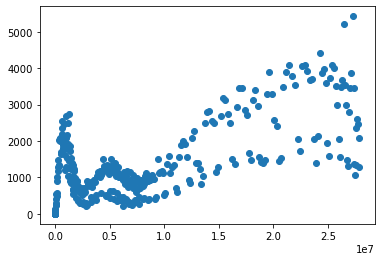

In [47]:
# Perform scatter plot of positive cases vs. death increase 
plt.scatter(df.positive, df.deathIncrease)

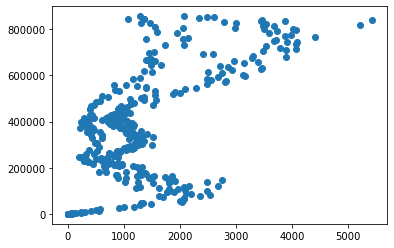

In [50]:
# Perform scatter plot of deathIncrease vs. hospitalizedCumulative
plt.scatter(df.deathIncrease, df.hospitalizedCumulative)